# **Sentimental Analysis of Customer Reviews**.

## Notice

The following methods for our sentimental analysis is based on the textbook's example for their text data:  An Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly). Copyright 2017 Sarah Guido and Andreas Müller, 978-1-449-36941-5.

Some modifications are done in order to make it work with our data and we added more learning methods and visualization for the purpose of our Machine Learning Project

# **Python Imports**

Import the libraries we will be using for our project

In [30]:
# Imports for Data Processing
import math                                                     # To use the random function
import random                                                   # To randomly split the input data into a training set and a test set
import csv                                                      # To read and split comma separated files or other delimiter
import glob                                                     # Unix style pathname pattern expansion
import re                                                       # To use regular expressions
from google.colab import drive                                  # To use the three files stored in Amiel's Google Drive

# Imports for Data Splitting and Training
import numpy as np                                              # To use numpy arrays
from sklearn.model_selection import train_test_split            # To split our data
from sklearn.ensemble import GradientBoostingClassifier         # ML algorithm for our sentiment analyzer
from sklearn.feature_extraction.text import CountVectorizer     # To create bag of words

# Imports for Data Analyzing
import pandas as pd                                             # To use a bar graph for our prediction results 
from sklearn.metrics import confusion_matrix                    # To display a summary of the prediction results
from sklearn.metrics import classification_report               # To analyze our prediction results

*All the functions defined here are where we will be using for our sentimental 
analysis*

This is a simplified version of the [Sentimental Analysis Project](https://colab.research.google.com/drive/1AnsFgIXoibD4XET9OAR2HvEqMX4LLxjx?usp=sharing).

Mostly all statistical data was removed along with experimenting with a large proportion of learning models and their parameters.

Only one learning model, and one set of parameters is used here, which were the best one from the project linked above.

Other changes include the addition of different emojis, cleaner code, compacted import list, split data fraction and a user input review for our learning model to analyze.

# **Mount drive for data extraction**



---



❗️ **DO NOT CLICK OR RUN THE CELL BELOW** ❗️ or else it will __mount your__ drive instead of Amiel's drive where the files are located

Mount Amiel's Google Drive and get check what files we will be using for Sentiment Analysis

In [31]:
#get data from Amiel's google drive
drive.mount('/content/gdrive')
print()
# View the data in the folder present from the drive
!ls "/content/gdrive/My Drive/Sentiment Analysis Data/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

amazon_cells_labelled.txt  imdb_labelled.txt  yelp_labelled.txt


❗️ **DO NOT CLICK OR RUN THE CELL ABOVE** ❗️ or else it will __mount your__ drive instead of Amiel's drive where the files are located



---



# **PIP installs**

Install the required `sklearn` library for our project to train our learning model

In [32]:
!pip install -U scikit-learn



---



# **Functions Defined**

## Step 1: Data Processing Function 

Process input data made reviews from Yelp restuarants, Amazon products, and IMDB movies. 

[Data Input Source from UC Davis](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

In [33]:
def process_data():
  """ Process data for our data files. (Step 1)

    Process the data from our text files that contain reviews and the sentimental score for that review.
    Our text file contains the format: Review sentence \t sentimental score.

    :return: An input list of reviews and an output of an np array of the sentimental value (0 or 1).
  """
  # Get the files used for learning and testing. Should be three files:
  # amazon_cells_labelled.txt, yelp_labelled.txt and imdb_labelled.txt
  data_files = glob.glob("/content/gdrive/My Drive/Sentiment Analysis Data/*.txt")
  # populate input list and output list with data, separating sentences from the scores
  input_list = []   # Input list containing review sentences
  output_list = []  # Output list containing sentiment values of 0 or 1: 0 negative or 1 positive
  # Go through all the files and populate the input data along with its sentiment value in the output list
  for data_file in data_files:
      # For all text files we read one at a time
      with open(data_file, 'r') as file:
          # Read file and seperate review sentences from sentiment value
          text = csv.reader(file, delimiter='\t')  # since our files are separated by a tab space
          for line in text:
              # For each line we will get a sentence and a sentiment value of 0(negative) and 1(positive)
              sentence = line[0]                      # Get review sentence
              # The following 3 re.sub gets rid of any tabs and newlines for better extraction
              sentence = re.sub('\\t0', '', sentence)  
              sentence = re.sub('\\t1', '', sentence)
              sentence = re.sub('\n', '', sentence)
              # Add sentence review and sentiment value to our lists
              input_list.append(sentence)       # One sentence of a review            
              output_list.append(int(line[1]))  # Sentiment Value

  # Make our output an np array to be compatible with sklearn functions(np array)
  output_array = np.array(output_list) 
  
  return input_list, output_array



---



## Step 2: Data Splitting Function

Split our data into two sets: Training Data and Test Data

In [34]:
def split_data(X, y):   
  """ Split our data set of outputs and inputs. (Step 2)
      :param X:   The input list of our data set. In our case it will be sentences of a review.
      :param y:   The output list/array of our data set. In our case it will be the sentiment value based on a review.
      :return:    Four lists of: An input training set, an input test set, an output training set, and an output test set.
  """
  # Constants for our arguments passed in sklearn.train_test_split
  TEST_FRACTION = .25   # The fraction size of our test data 
  RANDOM_STATE = 68     # The constant random state we will use to shuffle the data if we decide to use one

  #Call sklearn.train_test_split to split our datat into two (Training and Test)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRACTION)

  return X_train, X_test, y_train, y_test



---




## Step 3: Data Transformation Function

Transform Data into bag-of-words representation method


In [35]:
def get_bag_of_words(input_text_list):
  """ get bag of words representation for data set of inputs (aka transforming the training data).
      These will help us train our data set easier.

      :param input_text_list: The input list that will like to have a bag-of-words representation.
      :return: A bag of words list along with its vector, e.g.: bag-of-words, vect
  """
    
  vect = CountVectorizer().fit(input_text_list)            # Create an instance of CountVectorizer
  transform_text_list = vect.transform(input_text_list)    # Transform the text list

  return transform_text_list, vect

def get_bag_of_words_one_input(sentence):
  vect = CountVectorizer().fit(sentence)
  transform_sent = vect.transform(sentence)

  return transform_sent

## Step 4: Display Prediction Output

In [36]:
def getSentimmentEmojiFaces():
  """ Emoji face constants that we will be using to represent a sentiment value
      :return sentiment_val_1, sentiment_val_0
  """
  ANGRY_FACE = '\U0001F603'   # 😡
  SMILY_FACE = '\U0001F621'   # 😃
  

  return SMILY_FACE, ANGRY_FACE

def getSentimentEmojiThumbs():
  """ Emoji thumbs constants that we will be using to represent a sentiment value
      :return sentiment_val_1, sentiment_val_0
  """
  THUMBS_DOWN = '\U0001F44E'  # 👎
  THUMBS_UP = '\U0001F44D'    # 👍

  return THUMBS_UP, THUMBS_DOWN

---




# **Step 1: Data Processing**



## Data processing example

Display how our data looks after extracting the data from our drive and cleaning it to remove tab spaces and newline characters
*   One numpy array called input_list made of single sentence reviews
*   One numpy array called output_list made of sentiment value for the single sentence review





First, print the sentiment value of a review sentence.
*   0 for a negative review
*   1 for a positive review

Then, print the review sentence from a restuarant, movie or a product.





In [37]:
if __name__ == '__main__':
  # Process our data
  input_list, output_list = process_data()
  input_len = len(input_list)
  for index in range(0, input_len):
    print(output_list[index],'-',input_list[index])
  print('Total Length:',len(input_list))

0 - A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
0 - Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
0 - Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
0 - Very little music or anything to speak of.  
1 - The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  
0 - The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  
0 - Wasted two hours.  
1 - Saw the movie today and thought it was a good effort, good messages for kids.  
0 - A bit predictable.  
1 - Loved the casting of Jimmy Buffet as the science teacher.  
1 - And those baby owls were adorable.  
1 - The movie showed a lot of Florida at it's best, made it look very appealing.  
1 - The S

# **Step 2: Data splitting**

Split our data in two halves. One half for training and the other for testing. The training set will then be further split in two parts: one for training and the other for validation when we test for hyperparameters. So our final sets will be the following ratios from our data: (training set:25%),(validation set: 25%), and (testing set: 50%). 

In [38]:
  # Split our data
  # First half will be training set and the second half will be testing set
  X_train, X_test, y_train, y_test = split_data(input_list,output_list)

# **Step 3: Transform Data**

Transform our training set into a bag of words

In [39]:
  transformed_X_train, X_train_vect = get_bag_of_words(X_train)               # Set our input data into bag of words for feature extraction

# **Step 4 Train and Test**

Using Gradient Boosting Classifier ML algorithm

In [40]:
  # Get best parameters that we got (See the long statistical analysis of this project)
  grbt_best = GradientBoostingClassifier(learning_rate=0.2, loss='exponential', 
                                         max_depth=8,max_features='sqrt')

  # Train our learning model
  grbt_best.fit(transformed_X_train, y_train)
  X_test_transformed = X_train_vect.transform(X_test)
  # Now make the predictions from our test set
  grbt_y_predict = grbt_best.predict(X_test_transformed)
  # Calculate and display the test score
  np.mean(grbt_y_predict==y_test)
  print('Test Score: {:.2f}'.format(grbt_best.score(X_test_transformed, y_test)))

Test Score: 0.81


## Display Prediction Results

Print Data with prediction using emojis as the sentiment values


First Column
*   ✓ Correct Prediction
*   ✕ Incorrect Prediction

Second Column
*   😃 Predicted a good review
*   😡 Predicted a bad review

Third Column
*   A review sentence







In [41]:
  length = len(y_test)
  incorrect_pred = []
  neg_sentiment, pos_sentiment = getSentimmentEmojiFaces()
  # Check mark or cross mark depending if we correctly predicted the sentiment
  CORRECT_PRED = '\U00002713'  # ✓
  WRONG_PRED = '\U00002715'    # ✕
  for index in range(length):
    truth_val = y_test[index]           # Get the actual sentiment value
    prediction = grbt_y_predict[index]  # Get the sentiment prediction value from our learning algorithm
    sentence = X_test[index]            # Get the paired review sentence that comes with this sentiment
    
    correct_pred = ''
    if truth_val == prediction:
      correct_pred = CORRECT_PRED
    else:
      correct_pred = WRONG_PRED
      incorrect_pred.append(index)
    
    pred_sentiment = pos_sentiment if prediction else neg_sentiment 	
    print(correct_pred, pred_sentiment, X_test[index])

✓ 😃 10/10  
✓ 😡 As much as I'd like to go back, I can't get passed the atrocious service and will never return.
✕ 😡 will definitely be back!
✓ 😃 They know how to make them here.
✓ 😃 I own a Jabra Earset and was very happy with it, but the sound quality, especially outgoing, on this is better.
✓ 😡 When I placed my treo into the case, not only was it NOT snug, but there was A LOT of extra room on the sides.
✓ 😡 there is no real plot.  
✓ 😃 I recently tried Caballero's and I have been back every week since!
✕ 😡 Oh this is such a thing of beauty, this restaurant.
✓ 😃 Later I found myself lost in the power of the film.  
✓ 😡 Service sucks.
✓ 😡 The camera on the phone may be used as a dustpan when indoors... I'd rather be using a disposable then this.
✓ 😃 Their regular toasted bread was equally satisfying with the occasional pats of butter... Mmmm...!
✕ 😡 Plantronics Bluetooth Excelent Buy.
✕ 😡 Light weight, I hardly notice it is there.
✕ 😃 I as well would've given godfathers zero stars if p

Total number of incorrect predictions

In [42]:
  print(len(incorrect_pred),'out of',len(y_test), 'predictions.')

129 out of 687 predictions.


## Display Prediction Stats

In [43]:
  print('Number of wrong predictions:',len(incorrect_pred),'out of', len(grbt_y_predict))
  predPerc =  1 - (len(incorrect_pred) / len(grbt_y_predict)) 
  print('Prediction Accuracy: %.2f' % predPerc, '%') 

Number of wrong predictions: 129 out of 687
Prediction Accuracy: 0.81 %


In [44]:
  confusion = confusion_matrix(y_pred=grbt_y_predict, y_true=y_test)
  print(confusion)

[[291  45]
 [ 84 267]]


In [45]:
  print(classification_report(y_test, grbt_y_predict, target_names=["Bad review", "Good review"]))

              precision    recall  f1-score   support

  Bad review       0.78      0.87      0.82       336
 Good review       0.86      0.76      0.81       351

    accuracy                           0.81       687
   macro avg       0.82      0.81      0.81       687
weighted avg       0.82      0.81      0.81       687



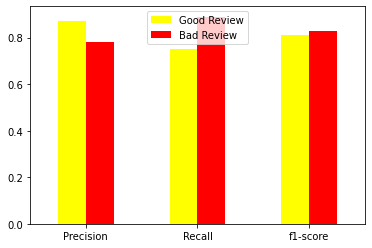

In [46]:
  positive_values = [0.87, 0.75,0.81]
  negative_values = [0.78, 0.89,0.83]
  index = ['Precision', 'Recall', 'f1-score',]
  df = pd.DataFrame({'Good Review': positive_values,
                    'Bad Review': negative_values}, index=index)
  ax = df.plot.bar(rot=0, color={"Good Review": "yellow", "Bad Review": "red"})

### Display wrong predictions from our model

#### Display Positive-Negative errors

In [47]:
  for index in incorrect_pred:
    truth_val = y_test[index]
    prediction = grbt_y_predict[index]
    if prediction:
      sentence = X_test[index]
      pred_sentiment = '\N{grinning face}' if prediction else '\N{pouting face}' 	
      truth_sentiment = '\N{grinning face}' if truth_val else '\N{pouting face}'
      print('P:',pred_sentiment,'A:', truth_sentiment, X_test[index])  

P: 😀 A: 😡 I as well would've given godfathers zero stars if possible.
P: 😀 A: 😡 My father has the V265, and the battery is dying.
P: 😀 A: 😡 My rating: just 3 out of 10.  
P: 😀 A: 😡 Used and dirty.
P: 😀 A: 😡 Echo Problem....Very unsatisfactory
P: 😀 A: 😡 The guy who said he's had better dialogue with his potted plants has it right.  
P: 😀 A: 😡 First of all, it doesn't wear well.
P: 😀 A: 😡 If you haven't choked in your own vomit by the end (by all the cheap drama and worthless dialogue) you've must have bored yourself to death with this waste of time.  
P: 😀 A: 😡 very tough and very short on flavor!
P: 😀 A: 😡 It was a pale color instead of nice and char and has NO flavor.
P: 😀 A: 😡 For that price I can think of a few place I would have much rather gone.
P: 😀 A: 😡 The picture resolution is far below what other comparably-priced phones are offering today.
P: 😀 A: 😡 I think food should have flavor and texture and both were lacking.
P: 😀 A: 😡 It was a good thing that the tickets only cost fiv

#### Display Positive-Negative errors

In [48]:
  print('Predicted, Actual\n')
  for index in incorrect_pred:
    truth_val = y_test[index]
    prediction = grbt_y_predict[index]
    if not prediction:
      sentence = X_test[index]
      pred_sentiment = '\N{grinning face}' if prediction else '\N{pouting face}' 	
      truth_sentiment = '\N{grinning face}' if truth_val else '\N{pouting face}'
      print('P:',pred_sentiment,'A:', truth_sentiment, X_test[index])  

Predicted, Actual

P: 😡 A: 😀 will definitely be back!
P: 😡 A: 😀 Oh this is such a thing of beauty, this restaurant.
P: 😡 A: 😀 Plantronics Bluetooth Excelent Buy.
P: 😡 A: 😀 Light weight, I hardly notice it is there.
P: 😡 A: 😀 As a courtroom drama, it's compelling, as an indictment on the American justice system, it's frightening.  
P: 😡 A: 😀 The only thing I did like was the prime rib and dessert section.
P: 😡 A: 😀 This place receives stars for their APPETIZERS!!!
P: 😡 A: 😀 If you have not seen this movie, I definitely recommend it!  
P: 😡 A: 😀 Nothing short of magnificent photography/cinematography in this film.  
P: 😡 A: 😀 Director Neil LaBute uses brutal violence to seperate dreams from reality, and along with the touching drama, and hilarious comedy, you can never tell what is going to happen next.  
P: 😡 A: 😀 The menu had so much good stuff on it i could not decide!
P: 😡 A: 😀 Everyone is treated equally special.
P: 😡 A: 😀 All in all, I'm quite satisfied with this purchase.
P: 😡 A: 

# Enter Your Own Review

In [49]:
  # Get input from user
  custom_input_review = input('Enter a one sentence review\n')

  # Print input from the user
  print()
  print('One sentence review:')
  print(custom_input_review)

  # Predict sentiment value of user's input
  cust_transformed = X_train_vect.transform([custom_input_review])  # Transform input into data we have trained with
  cust_predict = grbt_best.predict(cust_transformed)                # Make prediction

  # Print prediction result
  NEG_SENTIMENT, POS_SENTIMENT = getSentimmentEmojiFaces()
  pred_emoji = POS_SENTIMENT if cust_predict[0] else NEG_SENTIMENT

  print()
  print('Learning Model sentiment prediction:', pred_emoji)

Enter a one sentence review
The place is too small and the empanadas were burnt

One sentence review:
The place is too small and the empanadas were burnt

Learning Model sentiment prediction: 😡
